<a href="https://colab.research.google.com/github/GaneshK567/basic-nn-model/blob/main/Neural_Network_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import auth
import gspread
from google.auth import default 
import pandas as pd

In [5]:
auth.authenticate_user() 
creds, _ = default()
gc = gspread. authorize(creds)

In [6]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data = data)

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df.head()

,input,output
0,1,12
1,2,22
2,3,32
3,4,42
4,5,52


In [9]:
x= df[['input']].values 
y= df[['output']].values

In [10]:
X_train,X_test,y_train, y_test = train_test_split(x,y,test_size = 0.13,random_state=42)

In [11]:
Scaler = MinMaxScaler()

In [12]:
Scaler.fit(X_train) 
Scaler.fit(X_test)

MinMaxScaler()

In [13]:
X_train1= Scaler.transform(X_train) 
X_test1= Scaler.transform(X_test)

In [14]:
X_train1

array([[4.16666667e-02],
       [5.00000000e-01],
       [1.94583333e+01],
       [1.25000000e-01],
       [3.79166667e+00],
       [1.52916667e+01],
       [1.90000000e+01],
       [8.33333333e-02],
       [6.25000000e-01],
       [1.44416667e+02],
       [1.66666667e-01],
       [3.50000000e+00],
       [4.58333333e-01],
       [1.41666667e+00],
       [3.66666667e+00],
       [2.50000000e-01]])

In [24]:
ai_brain = Sequential([
Dense (10,activation = "relu"), 
Dense(12,activation = "relu"),
Dense(1)
])

In [25]:
ai_brain.compile(
optimizer = 'rmsprop',
loss = 'mse'
)

In [26]:
ai_brain.fit(X_train1,y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 5ms/step - loss: 23135.5527
Epoch 2502/5000
1/1 [==============================] - 0s 5ms/step - loss: 23102.6406
Epoch 2503/5000
1/1 [==============================] - 0s 4ms/step - loss: 23069.8789
Epoch 2504/5000
1/1 [==============================] - 0s 5ms/step - loss: 23037.0098
Epoch 2505/5000
1/1 [==============================] - 0s 4ms/step - loss: 23004.3184
Epoch 2506/5000
1/1 [==============================] - 0s 4ms/step - loss: 22971.5664
Epoch 2507/5000
1/1 [==============================] - 0s 4ms/step - loss: 22938.9375
Epoch 2508/5000
1/1 [==============================] - 0s 4ms/step - loss: 22906.2773
Epoch 2509/5000
1/1 [==============================] - 0s 4ms/step - loss: 22873.6855
Epoch 2510/5000
1/1 [==============================] - 0s 5ms/step - loss: 22841.1035
Epoch 2511/5000
1/1 [==============================] - 0s 4ms/step - loss: 22808.6035
Epoch 2512/5000
1/1

In [18]:
loss_df = pd.DataFrame(ai_brain.history.history)

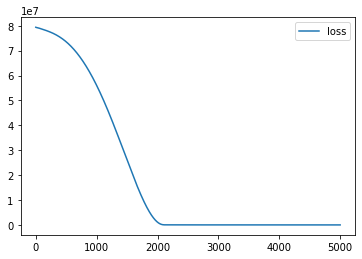

In [19]:
loss_df.plot()

In [20]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 329ms/step - loss: 3.9923


3.9923152923583984

In [21]:
X_n1 = [[89]]

In [22]:
X_n1_1 = Scaler.transform(X_n1)

In [28]:
ai_brain.predict(X_n1_1)

array([[892.38324]], dtype=float32)